In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *

In [3]:
path  = untar_data(URLs.CAMVID)

In [4]:
path.ls()

(#4) [Path('/root/.fastai/data/camvid/images'),Path('/root/.fastai/data/camvid/valid.txt'),Path('/root/.fastai/data/camvid/codes.txt'),Path('/root/.fastai/data/camvid/labels')]

In [5]:
with open(path/'valid.txt', 'r') as f:
    print(f.readlines())

['0016E5_07959.png\n', '0016E5_07961.png\n', '0016E5_07963.png\n', '0016E5_07965.png\n', '0016E5_07967.png\n', '0016E5_07969.png\n', '0016E5_07971.png\n', '0016E5_07973.png\n', '0016E5_07975.png\n', '0016E5_07977.png\n', '0016E5_07979.png\n', '0016E5_07981.png\n', '0016E5_07983.png\n', '0016E5_07985.png\n', '0016E5_07987.png\n', '0016E5_07989.png\n', '0016E5_07991.png\n', '0016E5_07993.png\n', '0016E5_07995.png\n', '0016E5_07997.png\n', '0016E5_07999.png\n', '0016E5_08001.png\n', '0016E5_08003.png\n', '0016E5_08005.png\n', '0016E5_08007.png\n', '0016E5_08009.png\n', '0016E5_08011.png\n', '0016E5_08013.png\n', '0016E5_08015.png\n', '0016E5_08017.png\n', '0016E5_08019.png\n', '0016E5_08021.png\n', '0016E5_08023.png\n', '0016E5_08025.png\n', '0016E5_08027.png\n', '0016E5_08029.png\n', '0016E5_08031.png\n', '0016E5_08033.png\n', '0016E5_08035.png\n', '0016E5_08037.png\n', '0016E5_08039.png\n', '0016E5_08041.png\n', '0016E5_08043.png\n', '0016E5_08045.png\n', '0016E5_08047.png\n', '0016E5_0

In [6]:
path_im = path/'images'
path_lbl = path/'labels'

In [7]:
fnames = get_image_files(path_im)
lbl_names = get_image_files(path_lbl)

<Axes: >

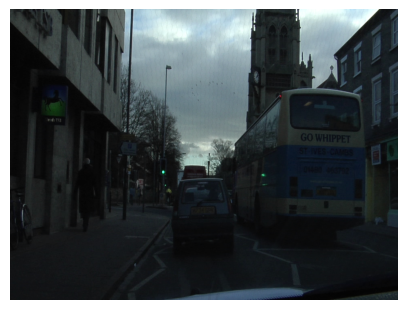

In [8]:
img_fn = fnames[10]
img = PILImage.create(img_fn)
img.show(figsize=(5,5))

In [9]:
img.shape

(720, 960)

In [10]:
get_msk = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}'

<Axes: >

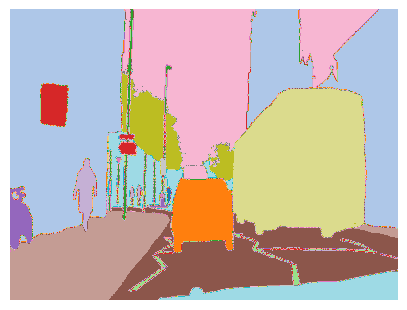

In [11]:
msk = PILMask.create(get_msk(img_fn))
msk.show(figsize=(5,5), alpha=1)

In [12]:
tensor(msk)

tensor([[ 4,  4,  4,  ...,  4,  4,  4],
        [ 4,  4,  4,  ...,  4,  4,  4],
        [ 4,  4,  4,  ...,  4,  4,  4],
        ...,
        [19, 19, 19,  ..., 30, 30, 30],
        [19, 19, 19,  ..., 30, 30, 30],
        [19, 19, 19,  ..., 30, 30, 30]], dtype=torch.uint8)

In [13]:
tensor(msk).shape

torch.Size([720, 960])

In [14]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [15]:
valid_fnames = (path/'valid.txt').read_text().split('\n'); # valid_fnames

In [16]:
sz = msk.shape; sz

(720, 960)

In [17]:
half = tuple(int(x/2) for x in sz); half

(360, 480)

In [18]:
def FileSplitter(fname):
    "Split `items` depending on the value of `mask`."
    valid = Path(fname).read_text().split('\n') 
    def _func(x): return x.name in valid
    def _inner(o, **kwargs): return FuncSplitter(_func)(o)
    return _inner

In [19]:
valid_fpaths = Path(path/'valid.txt').read_text().split('\n')

In [20]:
FileSplitter(path/'valid.txt')

<function __main__.FileSplitter.<locals>._inner(o, **kwargs)>

In [21]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=FileSplitter(path/'valid.txt'),
                   get_y=get_msk,
                   batch_tfms=[*aug_transforms(size=half), Normalize.from_stats(*imagenet_stats)])

In [22]:
#!pip install nbdev

In [23]:
doc(Normalize.from_stats)

Normalize.from_stats(mean, std, dim=1, ndim=4, cuda=True)
None

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [24]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [25]:
dls = camvid.dataloaders(path/'images', bs=8)

In [26]:
len(codes)

32

In [27]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [28]:
codes[1]

'Archway'

In [29]:
codes[30]

'Void'

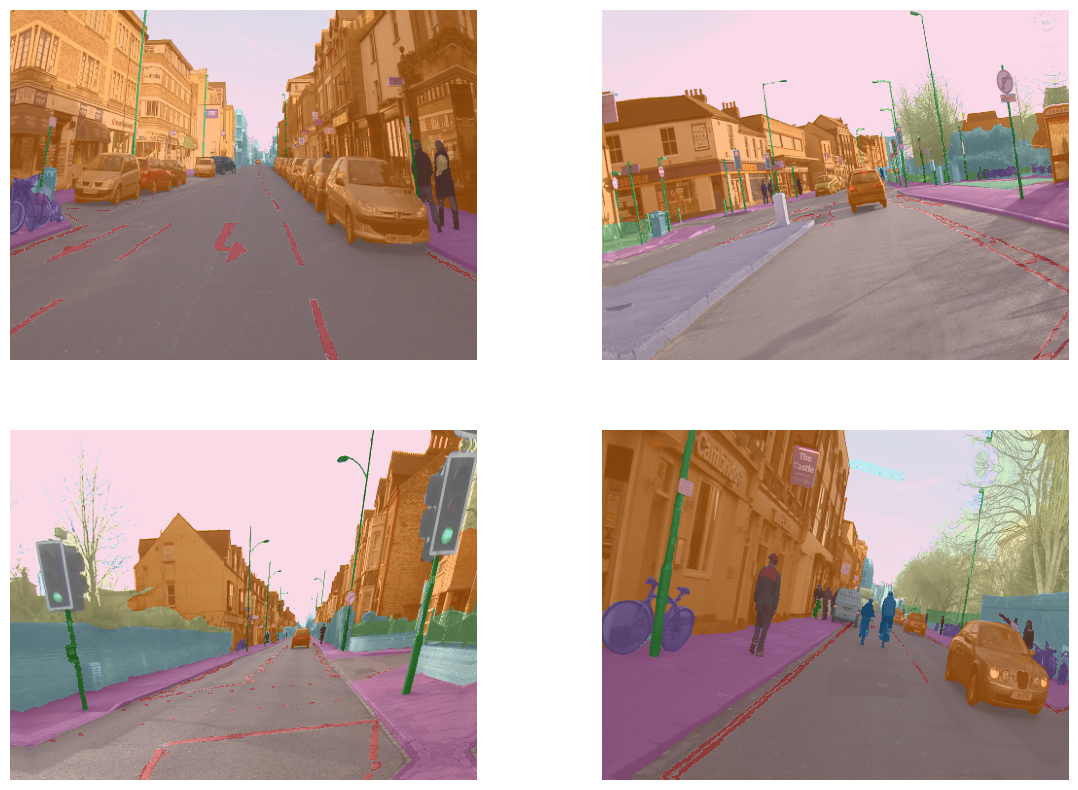

In [30]:
dls.show_batch(max_n=4, vmin=1, vmax=30, figsize=(14,10))

In [31]:
dls.vocab = codes

In [32]:
name2id = {v:k for k,v in enumerate(codes)}

In [33]:
void_code = name2id['Void']

In [34]:
void_code

30

In [35]:
def acc_camvid(inp, targ):
  targ = targ.squeeze(1)
  mask = targ != void_code
  return (inp.argmax(dim=1)[mask]==targ[mask]).float().mean()

In [36]:
opt = ranger

In [37]:
doc(ranger)

ranger(params: 'Tensor | Iterable', lr: 'float | slice', mom: 'float' = 0.95, wd: 'Real' = 0.01, eps: 'float' = 1e-06, k: 'int' = 6, alpha: 'float' = 0.5, *, sqr_mom: 'float' = 0.99, beta: 'float' = 0.0, decouple_wd: 'bool' = True) -> 'Lookahead'
Convenience method for `Lookahead` with `RAdam`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [38]:
learn = unet_learner(dls, resnet34, metrics=acc_camvid, self_attention=True, act_cls=Mish, opt_func=opt)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 169MB/s]


In [39]:
learn.summary()

DynamicUnet (Input shape: 8 x 3 x 360 x 480)
Layer (type)         Output Shape         Param #    Trainable 
                     8 x 64 x 180 x 240  
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     8 x 64 x 90 x 120   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

SuggestedLRs(valley=6.30957365501672e-05)

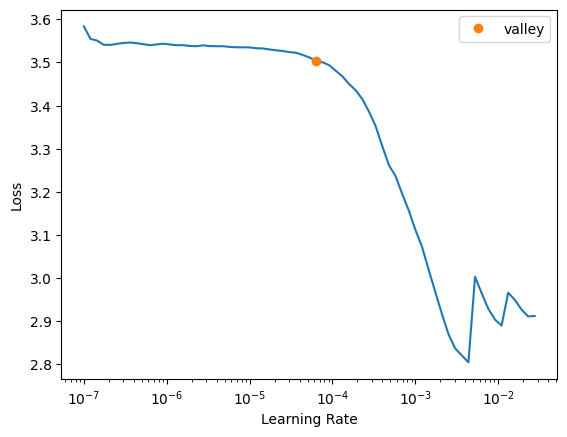

In [40]:
learn.lr_find()

In [41]:
lr = 1e-3

In [42]:
learn.fit_flat_cos(10, slice(lr))

epoch,train_loss,valid_loss,acc_camvid,time
0,1.207299,0.711776,0.836109,00:53
1,0.751455,0.505754,0.862656,00:53
2,0.568060,0.486438,0.855462,00:53
3,0.493050,0.364107,0.891109,00:53
4,0.443944,0.398391,0.887430,00:52
5,0.401069,0.306499,0.915157,00:52
6,0.370647,0.331798,0.909761,00:52
7,0.337666,0.278669,0.920667,00:52
8,0.298900,0.269713,0.923560,00:53
9,0.268082,0.264685,0.925566,00:52


In [43]:
learn.save('stage-1')
learn.load('stage-1');

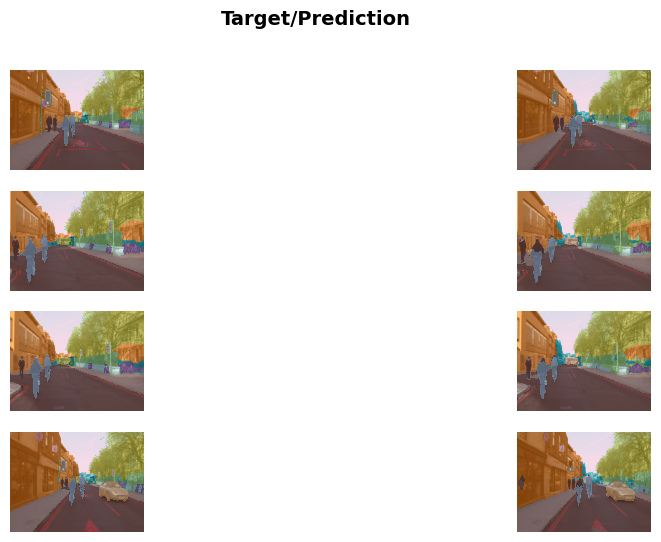

In [44]:
learn.show_results(max_n=4, figsize=(12,6))

In [45]:
lrs = slice(lr/400, lr/4)

In [46]:
lr, lrs

(0.001, slice(2.5e-06, 0.00025, None))

In [47]:
learn.unfreeze()

In [48]:
learn.fit_flat_cos(12, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.252635,0.277630,0.921529,00:54
1,0.246099,0.262159,0.925774,00:54
2,0.242001,0.294934,0.915585,00:54
3,0.240658,0.267920,0.924232,00:54
4,0.231781,0.274480,0.922169,00:54
5,0.222682,0.268045,0.924355,00:54
6,0.219436,0.274208,0.923827,00:54
7,0.214401,0.268966,0.924687,00:54
8,0.211413,0.262798,0.926451,00:54
9,0.201920,0.254783,0.927488,00:54


In [49]:
learn.save('model_1')

Path('models/model_1.pth')

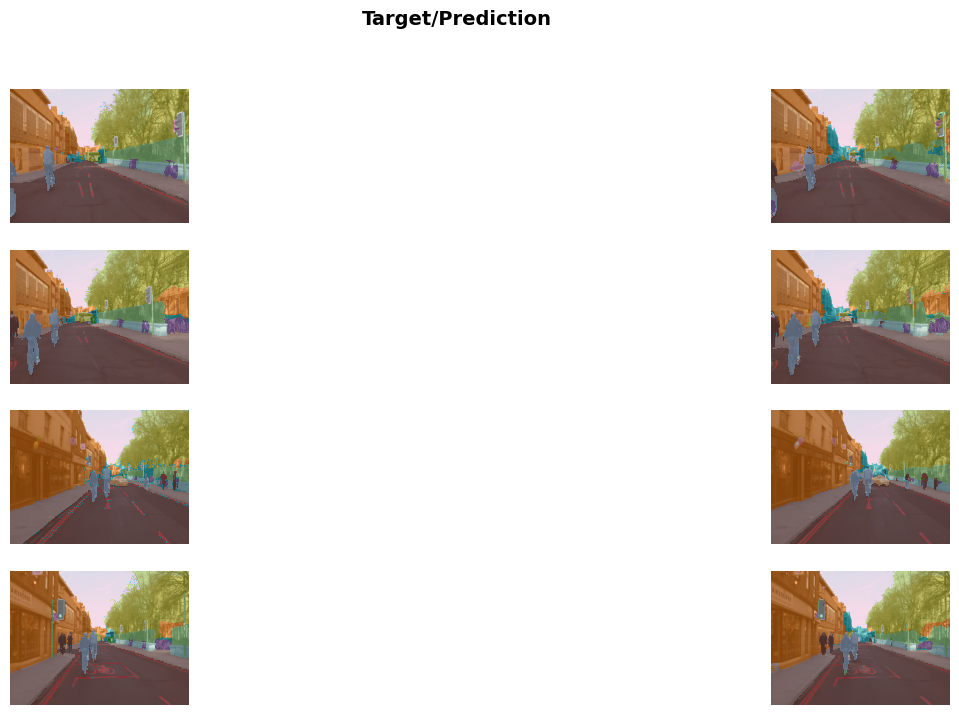

In [50]:
learn.show_results(max_n=4, figsize=(18,8))

In [51]:
dl = learn.dls.test_dl(fnames[:5])

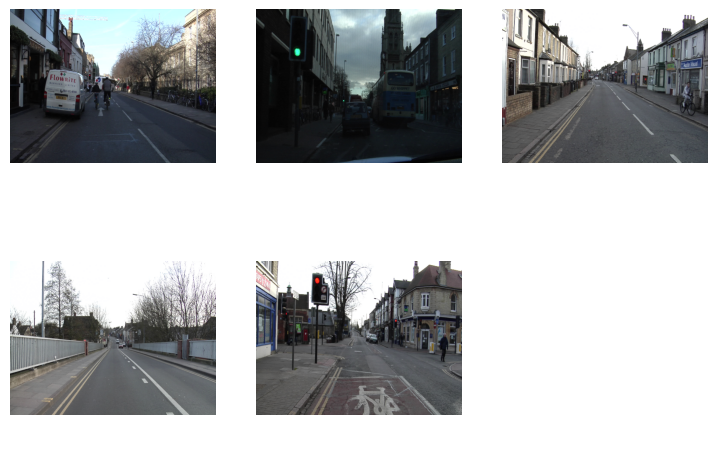

In [52]:
dl.show_batch()

In [53]:
preds = learn.get_preds(dl=dl)

In [54]:
preds[0].shape

torch.Size([5, 32, 360, 480])

In [55]:
len(codes)

32

In [56]:
pred_1 = preds[0][0]

In [57]:
pred_1.shape

torch.Size([32, 360, 480])

In [58]:
pred_arx = pred_1.argmax(dim=0)

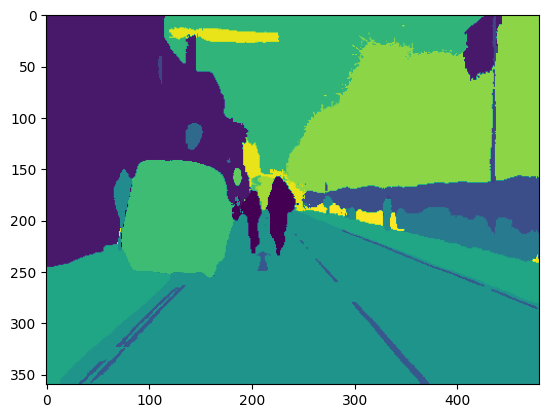

In [59]:
plt.imshow(pred_arx)

In [60]:
pred_arx = pred_arx.numpy()

In [61]:
rescaled = (255.0 / pred_arx.max() * (pred_arx - pred_arx.min())).astype(np.uint8)

In [62]:
im = Image.fromarray(rescaled)

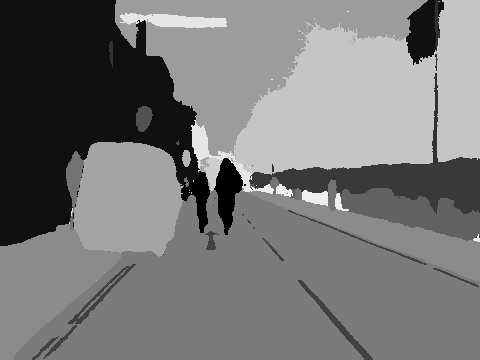

In [63]:
im

In [64]:
im.save('test.png')

In [65]:
for i, pred in enumerate(preds[0]):
  pred_arg = pred.argmax(dim=0).numpy()
  rescaled = (255.0 / pred_arg.max() * (pred_arg - pred_arg.min())).astype(np.uint8)
  im = Image.fromarray(rescaled)
  im.save(f'Image_{i}.png')

In [66]:
torch.save(preds[0][0], 'Image_1.pt')

In [67]:
pred_1 = torch.load('Image_1.pt')

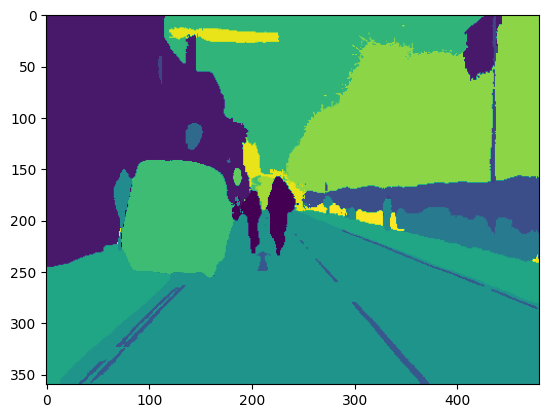

In [68]:
plt.imshow(pred_1.argmax(dim=0))